In [2]:
t = [1,2,3,4,5]

In [14]:
from rdkit import Chem
from rdkit.Chem import AllChem as Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdMolDescriptors as rdescriptors

In [4]:
drugbank = [mol for mol in Chem.SDMolSupplier("../data/drugbank.sdf") if mol]

[13:17:59] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 28 ignored.
[13:17:59] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 28 ignored.
[13:18:00] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
[13:18:00] ERROR: Could not sanitize molecule ending on line 250947
[13:18:00] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
[13:18:00] Explicit valence for atom # 17 O, 2, is greater than permitted
[13:18:00] ERROR: Could not sanitize molecule ending on line 258130
[13:18:00] ERROR: Explicit valence for atom # 17 O, 2, is greater than permitted
[13:18:00] Can't kekulize mol.  Unkekulized atoms: 57 58 59 60 61 62 63 64 65
[13:18:00] ERROR: Could not sanitize molecule ending on line 261581
[13:18:00] ERROR: Can't kekulize mol.  Unkekulized atoms: 57 58 59 60 61 62 63 64 65
[13:18:00] Can't kekulize mol.  Unkekulized atoms: 0 1 2 6 7 8 9 10 11 12 13 14 15 16 17
[13:18:00] ERROR: Could not 

In [5]:
None in drugbank

False

In [6]:
rings = [len(Chem.GetSSSR(mol)) for mol in drugbank]

In [7]:
sum(rings)/len(rings)

2.451123595505618

In [11]:
len(Chem.GetSSSR(cubane)), [[a for a in v] for v in Chem.GetSSSR(cubane)]

(5, [[0, 3, 2, 1], [0, 5, 4, 3], [0, 5, 6, 1], [1, 6, 7, 2], [3, 4, 7, 2]])

In [9]:
cubane = Chem.MolFromSmiles("C12C3C4C1C5C2C3C45")

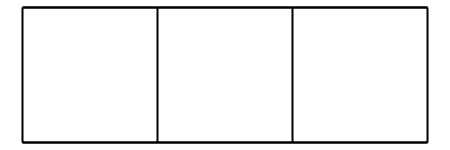

In [10]:
cubane

In [12]:
mol = Chem.MolFromSmiles('CC(=O)Nc1ccc(O)cc1')  # e.g. Paracetamol

In [15]:
Molf = rdescriptors.CalcMolFormula(mol)
print(Molf)

C8H9NO2


In [16]:
Molform = rdescriptors.CalcMolFormula(cubane)
print(Molform)

C8H8


In [31]:
def mw_mol(mol):
    return rdescriptors.CalcExactMolWt(mol)<500

In [32]:
rings = [len(Chem.GetSSSR(mol)) for mol in drugbank]
mws = [mw_mol(mol) for mol in drugbank]

In [33]:
mws

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,

In [34]:
sum(mws)

6257

In [35]:
percentage = (sum(mws) / len(mws)) * 100
print(percentage)

87.87921348314607


In [45]:
def Hydrogenbonds(mol):
    hbd = rdescriptors.CalcNumHBD(mol)  
    hba = rdescriptors.CalcNumHBA(mol)  
    return hbd <= 5 and hba <= 10  

In [46]:
lipinski_results = [Hydrogenbonds(mol) for mol in drugbank]

In [47]:
lipinski_percentage = (sum(lipinski_results) / len(lipinski_results)) * 100

In [48]:
print(lipinski_percentage)

88.27247191011236
